# Regularization

欢迎来到这次的算法优化实验，我们知道过拟合是深度学习训练中十分常见的问题，解决该问题的办法有许多中，例如增加数据量、Dropout、Regularization等方法，在本实验中你将会使用Dropout、Regularization操作来优化我们的模型，解决过拟合问题。

** 你将学会 **

- 通过L-2正则化操作解决模型过拟合问题

- 通过Dropout操作解决模型过拟合问题

现在让我们进入实验吧！

## 1 - 引用库

首先，载入几个需要用到的库：
其中，matplotlib.pyplot用于绘图，utils中包含了自定义的一些功能函数。

In [1]:
import matplotlib.pyplot as plt
import utils

# 绘图相关设置
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # 设置绘图的默认大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

** 问题描述 **

有来自两个类别的数据样本，它们的分布呈现一定规律。你需要设计一个分类器以将样本划分为两个类别。

** 数据获取 **

通过函数ulils.load_dataset()获取数据的分布如下（其参数表示保存数据分布图时所用的名字）：

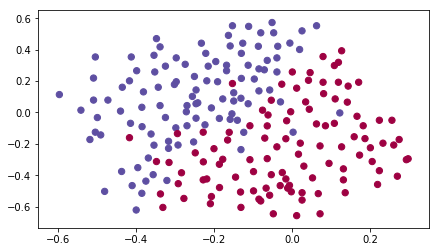

In [2]:
# 读入数据集
train_X, train_Y, test_X, test_Y = utils.load_dataset("data")

蓝色的圆点和红色的圆点分别表示两类样本的数据点

** 你的目标 **: 

用深度学习方法来生成一个分类器，将上述所有样本点划分为两类，使得尽可能多的点被正确分类。

** 数据集分析 **：

这个数据集有点噪声，一个直观的观察结果：左上角（蓝色）和右下角（红色）之间的对角线像是一个分界线。

- 你将首先尝试一个不采用任何正则化操作的模型

- 然后你将学习通过使用Regularization和Dropout操作来优化我们的模型

你通过使用下面这个model()函数，来实现一个三层神经网络，用于样本数据的分类：

- 首先尝试没有正则化的模型（without_regularization）

- 然后，你将执行以下两种操作来优化原来的模型：

    -  L2正则化  - 函数：“`caculate_cost_with_regularization（）`”和“`backward_caculate_with_regularization（）`”

    -  Dropout  - 函数：``forward_caculate_with_dropout（）`“和”`backward_caculate_with_dropout（）`“

在每个部分中，你可以调整参数来调用model()，看看下面的代码并熟悉它。

In [11]:
def model(X, Y, model_name="_without_regularization",
          learning_rate=0.3, iteration_num=30000, print_cost=True,
          lambd=0, keep_prob=1):
    """
    实现一个3层神经网络：三层网络的激活函数分别为RELU，RELU，SIGMOID
    Args:
        X: 输入数据，尺寸大小为(输入尺寸, 样本数量)
        Y: 数据真实标签，1表示蓝点，0表示红点，尺寸大小为(输出尺寸, 样本数量)
        model_name: model的名字，用于绘图输出，例如可用”_without_regularization“表示模型不采用任何正则化方式
        learning_rate: 学习步长
        iteration_num: 迭代次数
        print_cost: 打印flag，如果为真，则每10000次迭代输出一个目标函数cost值
        lambd: L2正则化超参数
        keep_prob: dropout操作超参数，取值范围为(0,1]，表示在dropout过程中一个神经元保持激活的概率
    Return:
        parameters: 模型的参数，可用于预测
    """


    m = X.shape[1]  # 样本数量
    layers_dims = [X.shape[0], 20, 3, 1]
    gradients = {}
    costs = []  # 用于记录cost值

    # 初始化参数
    parameters = utils.initialize(layers_dims)

    # 梯度下降循环

    for i in range(0, iteration_num):

        # 正向传播
        # 不使用dropout
        if keep_prob == 1:
            a3, cache = utils.forward_calculate(X, parameters)
        # 使用dropout
        elif keep_prob < 1:
            a3, cache = utils.forward_calculate_with_dropout(
                X, parameters, keep_prob)

        # 计算目标函数cost值
        # 不使用L2正则化
        if lambd == 0:
            cost = utils.calculate_cost(a3, Y)
        # 使用L2正则化
        else:
            cost = utils.calculate_cost_with_regularization(
                a3, Y, parameters, lambd)

        assert (lambd == 0 or keep_prob == 1)
        # 实际操作中允许同时使用L2正则化和dropot，但在本实验中每次仅使用其中一种正则化方法

        # 反向传播
        # 不使用正则化
        if lambd == 0 and keep_prob == 1:
            gradients = utils.backward_calculate(X, Y, cache)
        # 使用L2正则化
        elif lambd != 0:
            gradients = utils.backward_calculate_with_regularization(
                X, Y, cache, lambd)
        # 使用dropout
        elif keep_prob < 1:
            gradients = utils.backward_calculate_with_dropout(
                X, Y, cache, keep_prob)

        # 更新参数
        parameters = utils.update(
            parameters, gradients, learning_rate)

        # 如果绘图标志位print_cost为真，则每10000次迭代输出一个目标函数cost值
        if print_cost and i % 10000 == 0:
            print "Cost after iteration {}: {}".format(i, cost)
        if print_cost and i % 1000 == 0:
            costs.append(cost)

    # 绘制目标函数cost曲线
    plt.clf()
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    # plt.savefig("cost" + model_name + ".png") # 保存损失函数曲线图

    return parameters

首先，我们先调用model()训练一个没有加入任何正则化操作的模型(without_regularization)，并观察训练结果。

Cost after iteration 0: 0.655741529839
Cost after iteration 10000: 0.157852894492
Cost after iteration 20000: 0.140970302812


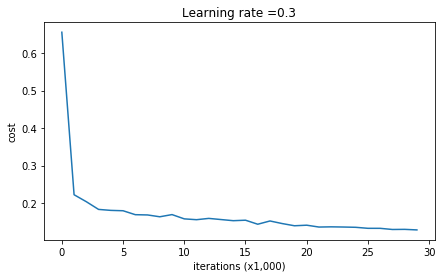

On the training set:
Accuracy: 0.938388625592
On the test set:
Accuracy: 0.92


In [12]:
# 训练不使用正则化的原始模型
model_name = "_without_regularization"
parameters = model(train_X, train_Y, model_name)
# 在训练集和测试集上的进行预测并输出准确率
print "On the training set:"
predictions_train = utils.predict(train_X, train_Y, parameters)
print "On the test set:"
predictions_test = utils.predict(test_X, test_Y, parameters)

我们可以看到训练准确率为93.8%，测试准确率为92%。我们把这个当做**基础模型**，在之后的实验中你将会看到通过加入正则化操作带来的优化效果。
为了更加直观的看到模型的分类效果，我们可以运行下述代码来看看这个模型的决策边界，即两类样本的分界线。

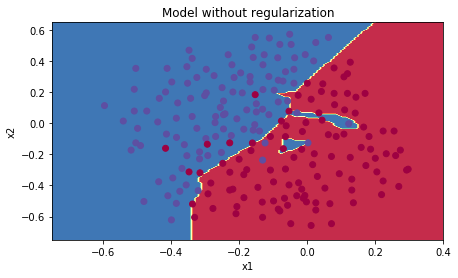

In [13]:
# 绘制边界预测结果图
plt.clf()
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75, 0.40])
axes.set_ylim([-0.75, 0.65])
utils.plot_boundary(
    lambda x: utils.predict_decision(parameters, x.T), train_X, train_Y,
    "decision_boundary" + model_name + ".png")

通过观察模型所绘制的分界线，我们发现**基础模型**产生了明显的过拟合的现象，它将噪声数据也包裹了进去，从而形成了很不自然的分界线。
接下来让我们分别用L2正则化（L2 Regularization）和Dropout来解决这个问题。

## 2 - L2正则化（L2 Regularization）

一个简单的解决过拟合的方法是**L2正则化**. 它简单地修改了**成本函数（Cost Function）**:

- 从原式：

$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$

- 修改为:

$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

下面让我们修改成本函数，观察训练结果吧.

**练习**: 实现 `calculate_cost_with_regularization()` 来计算公式 (2). 要计算 $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$  , 可以使用下述方法：
```python
np.sum(np.square(Wl))
```
你需要分别 $W^{[1]}$, $W^{[2]}$ , $W^{[3]}$都进行上面的计算, 将它们求和并乘以 $ \frac{1}{m} \frac{\lambda}{2} $.

In [16]:
def calculate_cost_with_regularization(A3, Y, parameters, lambd):
    """
    计算采用L2正则化的损失函数cost值
    Args:
        A3: 正向传播的输出，尺寸大小为(输出尺寸, 样本数量)
        Y: 真实标签向量，尺寸大小和a3相同
        parameters: 模型参数
        lambd: L2正则化超参数
    Return:
        cost: 损失函数cost值
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]

    cross_entropy_cost = calculate_cost(A3, Y)
    
    ### 练习代码开始处 ### (1-2行代码)
    L2_regularization_cost = None
    ### 练习代码结束处 ###
    
    cost = cross_entropy_cost + L2_regularization_cost

    return cost

现在你已经修改了成本函数，由于反向传播中的所有计算都是基于成本函数，所以你也得相应地修改反向传播的过程。

**练习**: 实现修改后的反向传播的过程`backward_calculate_with_regularization()`：需要修改dW1, dW2 and dW3，为它们各自添加一个正则化项的梯度值 ($\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$).

In [17]:
def backward_calculate_with_regularization(X, Y, cache, lambd):
    """
    实现采用L2正则化的反向传播过程
    Args:
        X: 输入数据，尺寸大小为(输入尺寸, 样本数量)
        Y: 0-1二值的数据真实标签
        cache: forward_calculate()输出的cache
        lambd: L2正则化超参数
    Return:
        gradients: 各种参数、变量对应的梯度
    """

    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y

    ### 练习代码开始处 ###（1行代码）
    dW3 = None
    ### 练习代码结束处 ###
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    ### 练习代码开始处 ###（1行代码）
    dW2 = None
    ### 练习代码结束处 ###
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)


    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    ### 练习代码开始处 ###（1行代码）
    dW1 = None
    ### 练习代码结束处 ###
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)


    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3, "dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients

** 模型训练 **

接下来让我们利用model()来训练加入L2正则化操作的模型 $(\lambda = 0.7)$。在`model()`内部将会使用: 
- `caculate_cost_with_regularization()` 替代 `caculate_cost()`
- `backward_caculate_with_regularization()` 替代 `backward_caculate()`

Cost after iteration 0: 0.697448726804
Cost after iteration 10000: 0.268538973778
Cost after iteration 20000: 0.268119252046


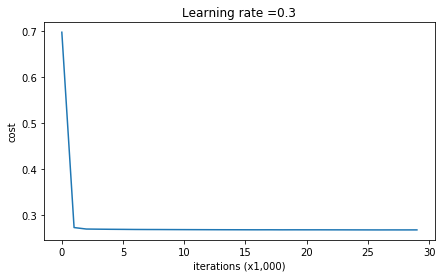

On the train set:
Accuracy: 0.9336492891
On the test set:
Accuracy: 0.95


In [20]:
# 训练使用L2正则化的模型
model_name = "_with_L2-regularization"
parameters = model(train_X, train_Y, model_name, lambd=0.7)
# 在训练集和测试集上的进行预测并输出准确率
print "On the train set:"
predictions_train = utils.predict(train_X, train_Y, parameters)
print "On the test set:"
predictions_test = utils.predict(test_X, test_Y, parameters)

可以看到在测试集上的准确率从基础模型的92%被提升至了95%！

** 绘制决策边界 **

现在让我们输出决策边界，对分类结果有一个更直观的认识。

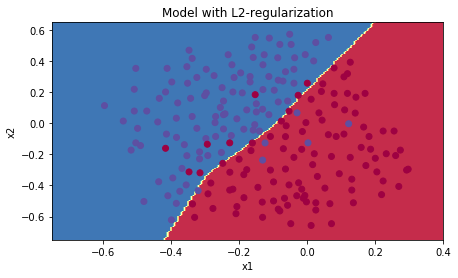

In [21]:
# 绘制边界预测结果图
plt.clf()
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75, 0.40])
axes.set_ylim([-0.75, 0.65])
utils.plot_boundary(
    lambda x: utils.predict_decision(parameters, x.T), train_X, train_Y,
    "decision_boundary" + model_name + ".png")

通过绘制的决策边界（即分界线），我们可以看到L-2正则化操作很好的解决了模型的过拟合问题。

**结论**:
- 参数 $\lambda$是一个超参数
- L2正则化让我们的模型更加平滑. 如果 $\lambda$ 太大, 会导致模型过度平滑（oversmooth）, 导致模型产生很大的训练误差。

**L2正则化究竟在做什么？**:

L2正则化依赖于这样的假设，即具有小权重的模型比具有大权重的模型简单。 因此，通过惩罚成本函数中权重的平方值，可以将所有权重削减到较小的值，使得模型更加平滑，从而减少过拟合问题。

**你应该记住** -- L2正则化的实现:

1. 成本函数cost的计算:
    - cost中添加了一个正则化项
    
2. 反向传播:
    - 在梯度下降中减去一个额外项
    
3. 权重值变小了 ("weight decay"): 
    - 权重被削减为更小的值.

## 3 - Dropout

在此小节内,我们将采用**Dropout**操作来优化我们的基础模型，解决其过拟合问题。

**在每次迭代中随机“关闭”一些节点** 

Dropout操作按照一定地概率随机选择一些隐藏层神经元进行“关闭”，即认为这些神经元不存在，从而让我们在每次迭代中只使用神经元中的一部分。这样做的直观意义是,它让我们不对某个神经元过分敏感，因为每个神经元都有几率会被“关闭”，从而减少过拟合的问题。

**练习**: 实现带Dropout的前向传播forward_caculate_with_dropout()。使用一个三层网络，并在第一层和第二层加入Dropout操作，因为我们不会在输入层和输出层使用Dropout。

**指导**:

实现Dropout操作，你需要进行以下四个步骤:

1. 我们设置变量 $d^{[1]}$ ，使用和 $a^{[1]}$ 一样的数据形状，并用 `np.random.rand()` 初始化为0到1之间。 使用向量化操作来构造 $D^{[1]} = [d^{[1](1)} d^{[1](2)} ... d^{[1](m)}] $ ，使用和 $A^{[1]}$一样的数据形状。
2. 将$D^{[1]}$ 中的值以(`1-keep_prob`)的概率设置为0，或者以(`keep_prob`)的概率设置成1。提示: 可以通过: `X = (X < keep_prob)`来实现上述目标。其中0和1分别相应地代表False（被“关闭”）和True（被“保留”）。
3. 设置 $A^{[1]}$ 为 $A^{[1]} * D^{[1]}$(因为我们“关闭”了一些神经元)。可以将 $D^{[1]}$ 当做掩码矩阵（mask）, 当乘以这个掩码矩阵时，就起到了“关闭”部分神经元的作用。
4. 让 $A^{[1]}$ 除以 `keep_prob`。 这样做使得使用dropout最后输出的期望值和未使用dropout的值相近(这样做被称作inverted dropout)。

In [ ]:
def forward_calculate_with_dropout(X, parameters, keep_prob=0.5):
    """
    实现采用dropout的正向传播过程
    Args:
        X: 输入数据，尺寸大小为(输入尺寸, 样本数量)
        parameters: 参数信息 "W1", "b1", "W2", "b2", "W3", "b3":
            W1 -- 权重矩阵
            b1 -- 偏置向量
            W2 -- 权重矩阵
            b2 -- 偏置向量
            W3 -- 权重矩阵
            b3 -- 偏置向量
        keep_prob:dropout操作超参数，取值范围为(0,1]，表示在dropout过程中一个神经元保持激活的概率
    Return:
        A3: 网络最后一层输出的激活函数值，即正向传播的输出
        cache: 保存的用于计算后向传播过程的信息
    """

    np.random.seed(1)

    # 获取参数信息
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    ### 练习代码开始处 ###（4行代码）
    D1 = None  # 步骤1：随机初始化矩阵D1
    D1 = None  # 步骤2：根据keep_prob大小将D1处理成0-1二值矩阵
    A1 = None  # 步骤3：暂时抑制A1的部分神经元
    A1 = None  # 步骤4：调整未被抑制的神经元的输出值
    ### 练习代码结束处 ###

    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    
    ### 练习代码开始处 ###（4行代码）
    D2 = None  # 步骤1：随机初始化矩阵D2
    D2 = None  # 步骤2：根据keep_prob大小将D2处理成0-1二值矩阵
    A2 = None  # 步骤3：暂时抑制A2的部分神经元
    A2 = None  # 步骤4：调整未被抑制的神经元的输出值
    ### 练习代码结束处 ###
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)

    return A3, cache


**练习**: 实现带Dropout的反向传播backward_calculate_with_dropout()。和之前一样，我们在训练一个三层的神经网络。使用存在cache中的 $D^{[1]}$ and $D^{[2]}$ 来给第一层和第二层神经元添加Dropout。

**指导**:

带Dropout的反向传播实现很简单，只需两步:

1. 在前向传播中我们利用 $D^{[1]}$ 来关闭了`A1`中的部分神经元。在后向传播者, 我们需要使用相同的 $D^{[1]}$ 来关闭 `dA1`中的部分神经元。

2. 在前向传播中， 我们让 `A1` 除以 `keep_prob`。所以在后向传播中, 你也需要让 `dA1` 除以 `keep_prob` 来让它们保持相同的scale。

In [ ]:
def backward_calculate_with_dropout(X, Y, cache, keep_prob):
    """
    实现采用dropout的反向传播过程
    Args:
        X: 输入数据，尺寸大小为(输入尺寸, 样本数量)
        Y: 0-1二值的数据真实标签
        cache: forward_calculate()输出的cache
        keep_prob: dropout操作超参数，取值范围为(0,1]，表示在dropout过程中一个神经元保持激活的概率
    Return:
        gradients: 各种参数、变量对应的梯度
    """

    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = 1. / m * np.dot(dZ3, A2.T)
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    ### 练习代码开始处 ###（2行代码）
    dA2 = None  # 步骤1：利用D2矩阵来暂时抑制与正向传播过程中相同的神经元
    dA2 = None  # 步骤2：调整未被抑制的神经元的输出值
    ### 练习代码结束处 ###
    
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1. / m * np.dot(dZ2, A1.T)
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    ### 练习代码开始处 ###（2行代码）
    dA1 = None  # 步骤1：利用D1矩阵来暂时抑制与正向传播过程中相同的神经元
    dA1 = None  # 步骤2：调整未被抑制的神经元的输出值
    ### 练习代码结束处 ###
    
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1. / m * np.dot(dZ1, X.T)
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3, "dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients

** 模型训练 **

接下来，我们通过model()训练采用Dropout的模型。训练时，让我们设置 (`keep_prob = 0.86`)。这意味着在每次迭代中我们要“关闭”在第一层和第二层中14%的神经元。在函数 `model()` 内部会使用:
- `forward_calculate_with_dropout()` 代替 `forward_calculate()`。
- `backward_calculate_with_dropout()` 代替 `backward_calculate()`。

Cost after iteration 0: 0.654391702854


utils.py:346: RuntimeWarning: divide by zero encountered in log
  -np.log(1 - A3), 1 - Y)
utils.py:346: RuntimeWarning: invalid value encountered in multiply
  -np.log(1 - A3), 1 - Y)


Cost after iteration 10000: 0.0610539476115
Cost after iteration 20000: 0.0606215205739


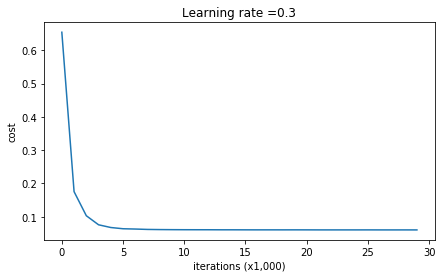

On the train set:
Accuracy: 0.924170616114
On the test set:
Accuracy: 0.95


In [22]:
# 训练使用dropout的模型
model_name = "_with_dropout"
parameters = model(train_X, train_Y, model_name, keep_prob=0.86)
# 在训练集和测试集上的进行预测并输出准确率
print "On the train set:"
predictions_train = utils.predict(train_X, train_Y, parameters)
print "On the test set:"
predictions_test = utils.predict(test_X, test_Y, parameters)

我们可以看到，模型在测试集上的准确率从基础模型的92%已经被提升至95%!

** 绘制决策边界 **

现在来绘制模型对应的决策边界，以对模型的分类结果有一个直观的认识。

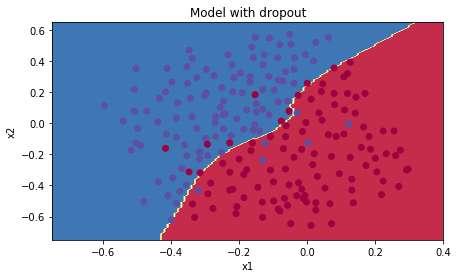

In [23]:
# 绘制边界预测结果图
plt.clf()
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75, 0.40])
axes.set_ylim([-0.75, 0.65])
utils.plot_boundary(
    lambda x: utils.predict_decision(parameters, x.T), train_X, train_Y,
    "decision_boundary" + model_name + ".png")

通过绘制的决策边界（即分界线），我们可以看到Dropout操作很好的解决了模型的过拟合问题。

**小提示**:
- 一个 **常见错误** 是许多人在训练和测试的过程都使用了Dropout，但其实我们只需要在训练过程中使用Dropout即可。

- 许多深度学习框架，比如[tensorflow](https://www.tensorflow.org/api_docs/python/tf/nn/dropout), [PaddlePaddle](http://doc.paddlepaddle.org/release_doc/0.9.0/doc/ui/api/trainer_config_helpers/attrs.html), [keras](https://keras.io/layers/core/#dropout) 或者 [caffe](http://caffe.berkeleyvision.org/tutorial/layers/dropout.html) 都提供Dropout的接口。

**对于Dropout，你应该记住:**
- Dropout是一个正则化方法。
- 你应该在训练过程中使用Dropout，在测试过程中请不要使用Dropout。
- 在前向传播和后向传播中都使用Dropout。
- 将每个使用Dropout的层除以 `keep_prob` 来保持输出值与原来的期望值一致。

##  4 - 总结

**结果统计**

下面是三个模型的训练结果: 

<table> 
    <tr>
        <td>
        **model**
        </td>
        <td>
        **train accuracy**
        </td>
        <td>
        **test accuracy**
        </td>

    </tr>
        <td>
        3-layer NN without regularization
        </td>
        <td>
        93.8%
        </td>
        <td>
        92%
        </td>
    <tr>
        <td>
        3-layer NN with L2-regularization
        </td>
        <td>
        93.4%
        </td>
        <td>
        95%
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with dropout
        </td>
        <td>
        92.4%
        </td>
        <td>
        95%
        </td>
    </tr>
</table> 

细心的你应该发现了，在应用了L2正则化和Dropout后，模型的train accuracy都有所下降。
这主要是因为它们都限制了模型的过拟合，但是鉴于模型最终的test accuracy得到了较大幅度的提升，所以它们还是对模型起到了优化的效果。

现在恭喜大家完成了本次实验。

**通过本实验你应该记住：**

1. 正则化能帮助我们减少过拟合的情况。
2. 正则化会导致权重值减小。
3. L2 Regularization和Dropout是两种有效的对抗过拟合的方法。